In [15]:
from cassL import camb_interface as ci
import copy as cp
import matplotlib.pyplot as plt
import numpy as np

In [8]:
m0 = ci.specify_neutrino_mass(ci.cosm.iloc[0], 0, 0)

h0 = 0.67
h_big = 0.79
h_small = 0.55

m0_bigh = cp.deepcopy(m0)
m0_bigh['h'] = h_big

m0_smallh = cp.deepcopy(m0)
m0_smallh['h'] = h_small

In [9]:
kh_m0, z_m0, ph_m0, s_m0 = \
    ci.evaluate_cosmology(m0, hubble_units=True)

kh_m0_bigh, z_m0_bigh, ph_m0_bigh, s_m0_bigh = \
    ci.evaluate_cosmology(m0_bigh, hubble_units=True)

kh_m0_smallh, z_m0_smallh, ph_m0_smallh, s_m0_smallh = \
    ci.evaluate_cosmology(m0_smallh, hubble_units=True)

In [10]:
k_m0, z_m0, p_m0, s_m0 = \
    ci.evaluate_cosmology(m0, hubble_units=False)

k_m0_bigh, z_m0_bigh, p_m0_bigh, s_m0_bigh = \
    ci.evaluate_cosmology(m0_bigh, hubble_units=False)

k_m0_smallh, z_m0_smallh, p_m0_smallh, s_m0_smallh = \
    ci.evaluate_cosmology(m0_smallh, hubble_units=False)

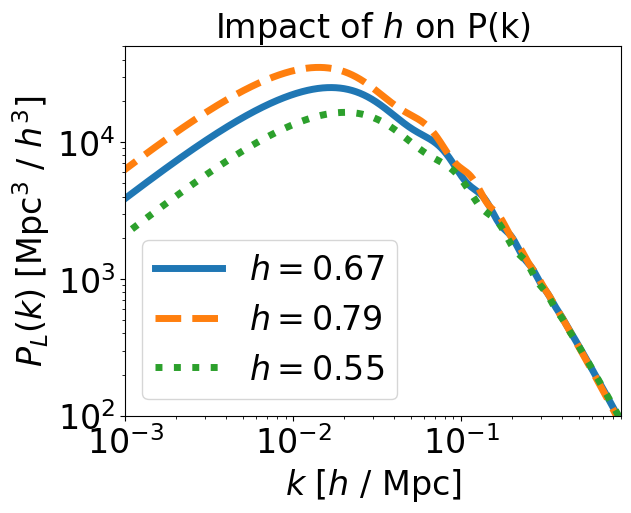

In [16]:
fig = plt.figure()
ax = fig.gca()

ax.set_title("Impact of $h$ on P(k)", fontsize=24)
ax.set_xlabel("$k$ [$h$ / Mpc]", fontsize=24)
ax.set_ylabel("$P_L(k)$ [Mpc$^3$ / $h^3$]", fontsize=24)

ax.loglog(kh_m0, ph_m0, label="$h = $" + str(h0),
          linestyle="solid", linewidth=5)
ax.loglog(kh_m0_bigh, ph_m0_bigh, label="$h = $" + str(h_big),
           linestyle="dashed", linewidth=5)
ax.loglog(kh_m0_smallh, ph_m0_smallh, label="$h = $" + str(h_small),
           linestyle="dotted", linewidth=5)

xlim = np.array((0.001, 0.9))
ylim = np.array((100, 50000))

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.tick_params(labelsize=24)

#plt.xticks(weight = 'bold')
plt.legend(fontsize=24)

plt.savefig("plots/h_impact_h_units.png", bbox_inches='tight')

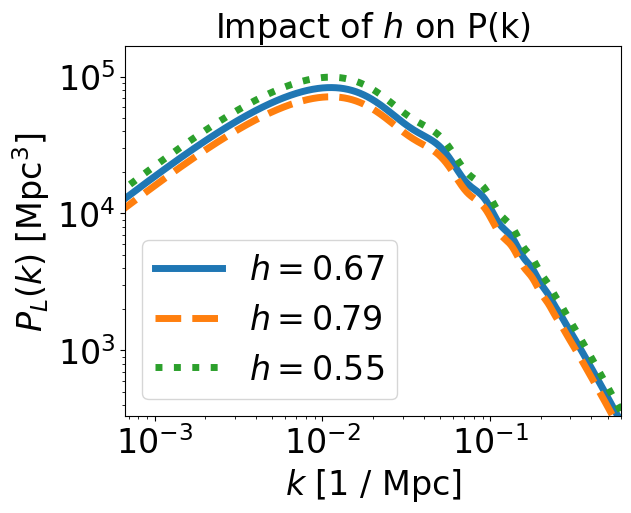

In [17]:
fig = plt.figure()
ax = fig.gca()

ax.set_title("Impact of $h$ on P(k)", fontsize=24)
ax.set_xlabel("$k$ [1 / Mpc]", fontsize=24)
ax.set_ylabel("$P_L(k)$ [Mpc$^3$]", fontsize=24)

ax.loglog(k_m0, p_m0, label="$h = $" + str(h0),
          linestyle="solid", linewidth=5)
ax.loglog(k_m0_bigh, p_m0_bigh, label="$h = $" + str(h_big),
           linestyle="dashed", linewidth=5)
ax.loglog(k_m0_smallh, p_m0_smallh, label="$h = $" + str(h_small),
           linestyle="dotted", linewidth=5)

ax.set_xlim(xlim * h0)
ax.set_ylim(ylim / h0 ** 3)

ax.tick_params(labelsize=24)

#plt.xticks(weight = 'bold')
plt.legend(fontsize=24)

plt.savefig("plots/h_impact_absolute_units.png", bbox_inches='tight')